In [74]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import datetime
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
sns.set_palette('colorblind')

In [3]:
biden = pd.read_csv("biden_tweets.csv")
trump = pd.read_csv("trump_tweets.csv")
# want to do cluster analysis, based on created_at date and favourites / retweets recieved 
# cluster by morning / day / evening <- created_at represented with military time 

In [4]:
biden.head()
biden.dtypes
date = biden["created_at"]
date[0]
biden["date"] = pd.to_datetime(biden["created_at"], format = "%Y-%m-%d %H:%M:%S")
trump["date"] = pd.to_datetime(trump["created_at"], format = "%Y-%m-%d %H:%M:%S")

len(trump['date'])

1607

In [7]:
# assign time of day values 
# morning = 5 am : 12 pm = any hour value from 5 to 11 
# afternoon = 12 pm : 5 pm = any hour value from 12 to 16 
# evening = 5 pm : 10 pm = any hour value from 17 to 22 
# night = 10 pm : 5 am = any hour value from 23 to 4 (23,0,1,2,3,4) <- wrap around
time_of_day_b = [None] * len(biden['date'])
for i in range(len(biden["date"])):
    hour = biden["date"][i].hour 
    if  5 <= hour <= 11: 
        time_of_day_b[i] = "morning"
    elif 12 <= hour <= 16:
        time_of_day_b[i] = "afternoon"
    elif 17 <= hour <= 22:
        time_of_day_b[i] = "evening"
    else:
        time_of_day_b[i] = "night"
# create column for word count 
tweet_length_b = [None] * len(biden['date'])
for i in range(len(biden["full_text"])):
    tweet_length_b[i] = len(biden["full_text"][i].split())

# same data processing for trump 
time_of_day_t = [None] * len(trump['date'])
for i in range(len(trump["date"])):
    hour = trump["date"][i].hour 
    if  5 <= hour <= 11: 
        time_of_day_t[i] = "morning"
    elif 12 <= hour <= 16:
        time_of_day_t[i] = "afternoon"
    elif 17 <= hour <= 22:
        time_of_day_t[i] = "evening"
    else:
        time_of_day_t[i] = "night"
# create column for word count 
tweet_length_t = [None] * len(trump['date'])
for i in range(len(trump["full_text"])):
    tweet_length_t[i] = len(trump["full_text"][i].split())
    


hour_b = [None] * len(biden['date'])
for i in range(len(biden['date'])):
    hour_b[i] = biden['date'][i].hour
             
hour_t = [None] * len(trump['date'])
for i in range(len(trump['date'])):
    hour_t[i] = trump['date'][i].hour

biden['time_of_day'] = time_of_day_b
biden['tweet_length'] = tweet_length_b
trump['time_of_day'] = time_of_day_t
trump['tweet_length'] = tweet_length_t
biden['hour'] = hour_b 
trump['hour'] = hour_t

# create columns that contain series of night vs day where night = 1 , day = 0 
day_night_map = {"morning":0, "afternoon":0, "evening":1, "night":1}
biden['day_or_night'] = biden['time_of_day'].map(day_night_map)
trump['day_or_night'] = trump['time_of_day'].map(day_night_map)
    

# Exploratory Data Analysis for Cluster Analysis 

In [10]:
# show number of tweets at certain times. I found it suprising the large amount of tweets during the night 
print("Biden: ")
print(biden.time_of_day.value_counts()) 
print('\n')
print("Trump: ")
print(trump.time_of_day.value_counts())


Biden: 
evening      1343
night        1196
afternoon     518
morning        27
Name: time_of_day, dtype: int64


Trump: 
night        555
evening      476
afternoon    409
morning      167
Name: time_of_day, dtype: int64


In [ ]:
# x axis constrained from 0 to 600,000 to remove outliers (tweets that recieved an abnormal amount of likes). 
# Time of day does not seem to impact favorite and retweet counts. 
# Linear relationship between number of favorites and number
# of retweets is expected. A more liked tweet is also expected to be have more retweets.

# sns.relplot(x = "favourite", y = "retweets", hue = "time_of_day", alpha = 0.4, data = biden)
# plt.xlabel("Number of Favorites")
# plt.ylabel("Number of Retweets")
# plt.xlim(left = 0, right = 600000)
# plt.ylim(bottom = 0, top = 300000)
# plt.show()

# sns.relplot(x = "favourite", y = "retweets", hue = "time_of_day", alpha = 0.4, data = trump)
# plt.xlabel("Number of Favorites")
# plt.ylabel("Number of Retweets")
# plt.xlim(left = 0, right = 600000)
# plt.ylim(bottom = 0, top = 300000)
# plt.show()


no clusters found when doing favorites vs retweets, which is why it is commented out 

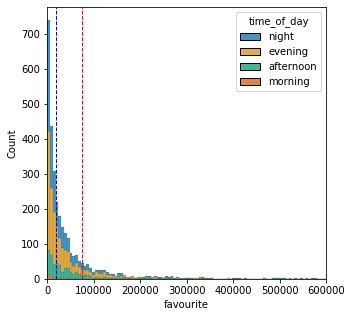

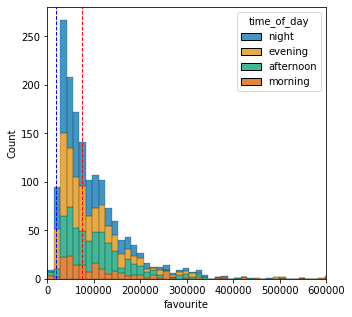

In [11]:
# blue dashed line = biden median value for favorites recieved 
# red dashed line = trump median value for favorites recieved 
plt.figure(figsize = (5,5))
sns.histplot(x="favourite", hue="time_of_day", multiple = "stack", data = biden)
plt.xlim(left = 0, right = 600000)
plt.axvline(biden['favourite'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(trump['favourite'].median(), color='red', linestyle='dashed', linewidth=1)

plt.figure(figsize = (5,5))
sns.histplot(x="favourite", hue="time_of_day", multiple = "stack", data = trump)
plt.xlim(left = 0, right = 600000)
plt.axvline(biden['favourite'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(trump['favourite'].median(), color='red', linestyle='dashed', linewidth=1)


plt.show()

### Tweet Length vs Number of Favorites

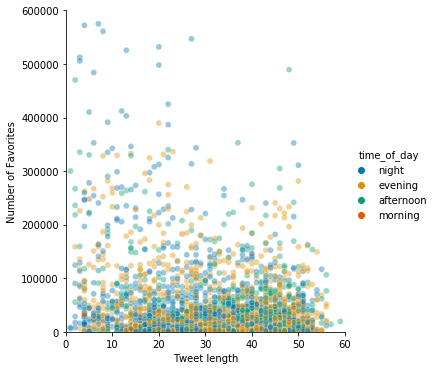

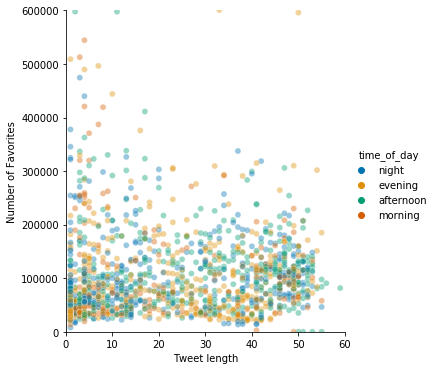

In [12]:
# does not seem to be a relationship between tweet length and number of favorites recieved 
# trump has many tweets that are a single hyperlink to another tweet, which is why he has many tweets of length = 1

sns.relplot(x = "tweet_length", y = "favourite", hue = "time_of_day", alpha = 0.4, data = biden)
plt.xlabel("Tweet length")
plt.ylabel("Number of Favorites")
plt.xlim(left = 0, right = 60)
plt.ylim(bottom = 0, top = 600000)

sns.relplot(x = "tweet_length", y = "favourite", hue = "time_of_day", alpha = 0.4, data = trump)
plt.xlabel("Tweet length")
plt.ylabel("Number of Favorites")
plt.xlim(left = 0, right = 60)
plt.ylim(bottom = 0, top = 600000)
plt.show()

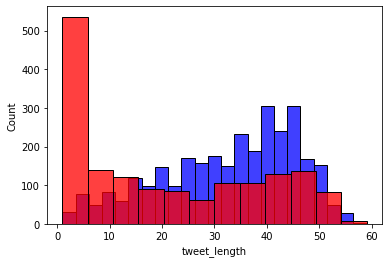

In [13]:
# not included in cluster analysis, possibly do an analysis using tweet length 
sns.histplot(x="tweet_length", color = 'blue', data = biden)
sns.histplot(x="tweet_length", color = 'red',data = trump)
plt.show()

### Research Question: Does the time of day impact tweet behavior? 
#### null hypothesis : time of day does not impact amount of favorites recieved by a tweet <- check for both trump and biden

In [15]:
# create columns that contain series of favorites depending on time of day
print("Biden:")
print(ttest_ind(biden['favourite'], biden['day_or_night']))
print("\n" + "Trump:")
print(ttest_ind(trump['favourite'], trump['tweet_length']))

Biden:
Ttest_indResult(statistic=28.5186800786555, pvalue=3.7943280941026356e-168)

Trump:
Ttest_indResult(statistic=40.81308857858013, pvalue=9.738192312218867e-294)


In [16]:
# normalize tweet favourite column 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit_transform(biden)
# print(ttest_ind(biden['favourite'], biden['hour']))

Both t-tests indicate that the null hypothesis should be rejected, and that there is a significant difference in 
the amount of likes recieved during the day (morning and afternoon) versus during the night (evening and night).

Ttest_indResult(statistic=28.511021489677074, pvalue=4.602892091368418e-168)
Ttest_indResult(statistic=40.81662344097929, pvalue=8.855117197632497e-294)


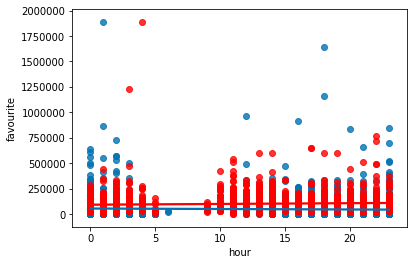

In [23]:
# I don't understand why this p-value is so low, should look into this, possibly because of outliers (tweets w many likes)
print(ttest_ind(biden['favourite'], biden['hour']))
print(ttest_ind(trump['favourite'], trump['hour']))
sns.regplot(x='hour', y = 'favourite', data = biden)
sns.regplot(x='hour', y = 'favourite', color = 'red', data = trump)
plt.show()

In [40]:
print("Number of Biden tweets recieving more than 200,000 favourites: {}".format(len(biden[biden['favourite'] > 200000])))
print("Number of Trump tweets recieving more than 200,000 favourites: {}".format(len(trump[trump['favourite'] > 200000])))

Number of Biden tweets recieving more than 200,000 favourites: 137
Number of Trump tweets recieving more than 200,000 favourites: 144


I am deciding to exclude the tweets that recieved more than 200,000 likes in both data sets because these values can greatly skew significance values and regression models. This means that 4.44% of biden data set is not included and 8.96% of trump data set is not included in the analysis.

slope ~ 0 from looking at graph, which suggests no relation

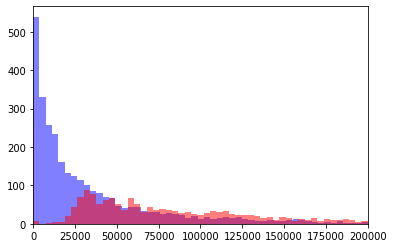

In [93]:
plt.hist('favourite', bins = 500, alpha = 0.5, color = 'blue', data = biden)
plt.hist('favourite', bins = 500, alpha = 0.5, color = 'red', data = trump)
plt.xlim(right = 200000)
plt.xlim(left = 0)
plt.show()

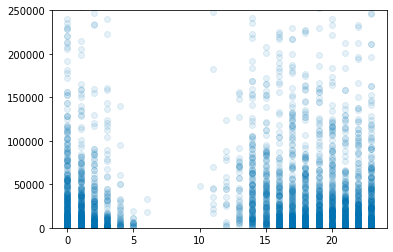

In [67]:
plt.scatter(biden['hour'],biden['favourite'], alpha = 0.1)
plt.ylim(top =250000, bottom = 0)
plt.show()

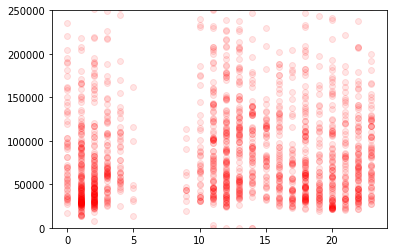

In [90]:
plt.scatter(trump['hour'],trump['favourite'], color = 'red', alpha = 0.1)
plt.ylim(top = 250000, bottom = 0)
plt.show()

## Logistic Regression
A heavily liked (favorited) tweet is one that recieves more than 50000 favorites, otherwise it is not heavily liked.

In [84]:
def liked(x):
    if x > 50000:
        return 1 
    else:
        return 0 
biden['loved'] = biden['favourite'].map(liked)
trump['loved'] = trump['favourite'].map(liked)

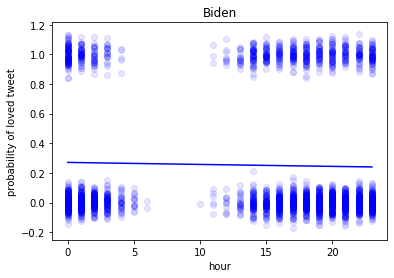

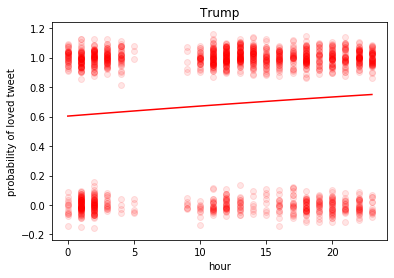

In [91]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)
x = 0
title = ['Biden', 'Trump']
color = ['blue', 'red']
df = [biden, trump]
for i in df: 
    model = LogisticRegression(solver = "lbfgs").fit(i[['hour']], i['loved'])
    x_values = np.linspace(0, 23, 100) 
    plt.scatter(i['hour'], i['loved'] + np.random.normal(0, 0.05, size=len(i)), alpha = 0.1, color = color[x])
    plt.plot(x_values, logit(x_values * model.coef_[0,0] + model.intercept_[0]), color = color[x])
    plt.title(title[x])
    plt.xlabel("hour")
    plt.ylabel("probability of loved tweet")
    plt.show()
    x +=1

From the logistic regression, there does not seem to be a strong correlation between the time a tweet is posted (hour of the day) and recieving more than 100,000 favorites for that tweet for either Trump or Biden.

### Question for Reviewers
